# Regression

## Linear Regression

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [51]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,3].reshape(-1, 1) # petal width (cm)
y = iris['data'][:,2] # petal length (cm)

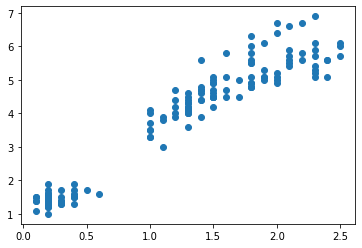

In [52]:
plt.scatter(X, y)

In [53]:
# import regression from sklearn
from sklearn.linear_model import LinearRegression

In [54]:
# fit/train the model using the data
reg = LinearRegression().fit(X, y)

In [58]:
print('score:', reg.score(X, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)

score: 0.9271098389904927
coef: [2.2299405]
intercept: 1.0835580328505112


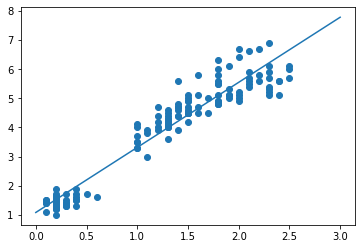

In [59]:
plt_x = np.linspace(0,3,2)
plt_y = plt_x * reg.coef_ + reg.intercept_
plt.scatter(X, y)
plt.plot(plt_x, plt_y)